# Python Lab

## Basic Arithmetic Operations
This cell demonstrates basic addition of two integers.

## Integer Interning in Python

Python uses **integer interning** (also called integer caching) as a memory optimization technique. For small integers in the range of -5 to 256, Python pre-creates and reuses the same integer objects rather than creating new ones each time.

This means when you assign the same small integer value to different variables, they actually reference the same object in memory, which is why `id(a)` and `id(b)` return identical memory addresses.

This optimization:

- Reduces memory usage
- Improves performance for frequently used small integers
- Is completely transparent to the programmer

In [1]:
a = 5
b = 3
print(a + b)

8


In [2]:
a = 5
b = 5
print(id(a), id(b))

4344447344 4344447344


## List Identity vs Equality

This cell demonstrates the difference between identity (`is`) and equality (`==`) with lists. Unlike small integers, lists are **not** interned in Python. Even when two lists have identical contents, they are separate objects in memory with different `id()` values. The `==` operator checks if values are equal, while `is` checks if they are the same object.

In [3]:
a = [1, 2, 3]
b = [1, 2, 3]
print(id(a), id(b))
print(a == b)
print(a is b)

4563424448 4563421952
True
False


## Mutable Objects in Python

Lists are **mutable objects**, meaning their contents can be modified after creation without changing their identity (memory address). This cell demonstrates how using `append()` modifies the list in-place - the `id()` remains the same before and after modification, proving it's the same object with changed contents.

In [4]:
b = [1, 2, 3]
print("Before append:")
print("b =", b)
print("id(b) =", id(b))

b.append(4)
print("\nAfter append:")
print("b =", b)
print("id(b) =", id(b))

Before append:
b = [1, 2, 3]
id(b) = 4563422464

After append:
b = [1, 2, 3, 4]
id(b) = 4563422464


## Copying Lists

This cell demonstrates different ways to create copies of lists in Python.

In [5]:
# Method 1: Using slicing
a = [1, 2, 3]
b = a[:]   # Create a shallow copy
b.append(4)
print(a, b)

# Method 2: Using list()
a = [1, 2, 3]
b = list(a)
b.append(4)
print(a, b)

# Method 3: Using copy library
import copy
a = [1, 2, [10, 20]]
b = copy.deepcopy(a)  # Create a deep copy
b[2].append(30)
print(a, b)

[1, 2, 3] [1, 2, 3, 4]
[1, 2, 3] [1, 2, 3, 4]
[1, 2, [10, 20]] [1, 2, [10, 20, 30]]


## Visualizing the Difference: Shallow vs Deep Copy

This example clearly demonstrates the behavior difference between `copy.copy()` (shallow) and `copy.deepcopy()` (deep):

- Variable `a`: Original list with a nested list `[2, 3]`
- Variable `b`: Shallow copy - creates a new outer list, but shares the nested list with `a`
  - When we do `b[1].append(4)`, it modifies the shared nested list
  - Both `a` and `b` show `[2, 3, 4]` because they point to the same nested list object
- Variable `c`: Deep copy - creates completely independent copies at all levels
  - When we do `c[1].append(5)`, it only modifies `c`'s own nested list
  - `a` and `b` are unaffected

Result: This proves shallow copy shares nested objects while deep copy creates truly independent copies.

In [6]:
import copy

a = [1, [2, 3]]
b = copy.copy(a)      # shallow copy
c = copy.deepcopy(a)  # deep copy

b[1].append(4)
c[1].append(5)

print("a:", a)
print("b:", b)
print("c:", c)

a: [1, [2, 3, 4]]
b: [1, [2, 3, 4]]
c: [1, [2, 3, 5]]


# Data Structures in Python

## Lists

Python's list is one of the most versatile **data structures**. Lists are:

- Ordered: Elements maintain their position
- Mutable: Can be modified after creation
- Dynamic: Can grow or shrink in size
- Heterogeneous: Can contain different data types

This cell demonstrates fundamental list operations: indexing to access elements and `append()` to add elements.

In [7]:
nums = [10, 20, 30]
print(nums[0])
nums.append(40)
print(nums)

10
[10, 20, 30, 40]


List can have different data type elements

In [8]:
nums = [10, "AI", [1, 2, 3], True]

In [9]:
nums = [1, 2, 3, 4]
for x in nums:
    print(x * 2)

2
4
6
8


Another **list comprehension**

In [10]:
nums = [1, 2, 3, 4]
doubles = [x * 2 for x in nums]
print(doubles)

[2, 4, 6, 8]


In [11]:
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]

flattened = [x for row in matrix for x in row]
print(flattened)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Create an array *nums* contains element from 1 to 10. And create another array *squares* based on *num* with square operator if element is even:

In [12]:
nums = list(range(1,10))
squares = [n**2 for n in nums if n % 2 == 0]
print(squares)

[4, 16, 36, 64]


The `range()` function creates an iterable that generates numbers on-demand using **lazy evaluation**:

- Lazy Evaluation: Values are generated only when needed, not all at once
- Memory Efficient: `range(1000000)` doesn't create a list of 1 million numbers in memory
- Iterable: Can be used in loops, converted to lists with `list()`, or consumed by other functions
- Immutable: The range object itself cannot be modified

Example: `range(1, 10)` creates an iterable that will produce numbers 1 through 9 when iterated over, but the numbers aren't generated until you actually use them (like in a loop or when converting to a list with `list(range(1, 10))`).

This is a key performance optimization in Python, especially when working with large sequences.

# NumPy

## Introduction to NumPy Arrays

**NumPy** (Numerical Python) is a fundamental library for scientific computing in Python. This cell demonstrates creating a NumPy array using `np.array()`:

- NumPy arrays are more efficient than Python lists for numerical operations
- The type `numpy.ndarray` (n-dimensional array) is the core data structure
- Arrays are homogeneous - all elements must be the same type
- Ideal for mathematical and scientific computations

In [13]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
print(arr)
print(type(arr))

[1 2 3 4 5]
<class 'numpy.ndarray'>


## Vectorized Operations in NumPy

This demonstrates **vectorization** - one of NumPy's most powerful features:

- Operations are applied to entire arrays at once, not element-by-element
- `arr + 10` adds 10 to every element without needing a loop
- Much faster than iterating through Python lists
- Makes code cleaner and more readable
- NumPy operations are implemented in C, providing significant performance gains

In [14]:
arr = np.array([1, 2, 3, 4, 5])
print(arr + 10)

[11 12 13 14 15]


In [15]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a + b)
print(a * b)
print(np.dot(a, b))

[5 7 9]
[ 4 10 18]
32


## Matrix Multiplication: `@` Operator vs Element-wise Operations

This cell demonstrates the `@` operator for **matrix multiplication**, which is fundamentally different from element-wise operations:

### The `@` Operator - Matrix Multiplication

- Performs linear algebra matrix multiplication (dot product)
- Each element in the result is the sum of products of corresponding row and column elements
- Formula: `(A @ B)[i,j] = sum of (A[i,k] * B[k,j])` for all k
- Calculation example from this cell:

  - `Result[0,0] = (1×5) + (2×7) = 5 + 14 = 19`
  - `Result[0,1] = (1×6) + (2×8) = 6 + 16 = 22`
  - `Result[1,0] = (3×5) + (4×7) = 15 + 28 = 43`
  - `Result[1,1] = (3×6) + (4×8) = 18 + 32 = 50`

### Element-wise Operations (`*`, `+`, `-`, `/`)

- `A * B` multiplies corresponding elements: `Result[i,j] = A[i,j] * B[i,j]`
- Simple position-by-position operation, no cross-element computation

Example: 

`[[1,2],[3,4]] * [[5,6],[7,8]] = [[1*5, 2*6],[3*7, 4*8]] = [[5,12],[21,32]]`


Key Difference: `@` combines multiple elements (row × column), while `*` operates on single pairs of elements.

In [16]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

print(A @ B)


[[19 22]
 [43 50]]


## NumPy Broadcasting Rules

**Broadcasting** is NumPy's powerful mechanism for performing operations on arrays of different shapes. Instead of requiring arrays to have identical dimensions, NumPy automatically "broadcasts" smaller arrays to match larger ones.

### Example 1: Adding a 1D array to a 2D matrix

This cell shows `A` (shape 2×2) + `b` (shape 2):

- `A` is `[[1,2], [3,4]]` (2×2 matrix)
- `b` is `[1, 2]` (1D array with 2 elements)
- NumPy broadcasts `b` to each row of `A`
- Equivalent to: `[[1,2], [3,4]] + [[1,2], [1,2]]`
- Result: `[[2,4], [4,6]]`

Broadcasting rule applied: The 1D array `b` is replicated along the missing dimension (rows) to match the 2D matrix shape.

In [17]:
A = np.array([[1, 2],
              [3, 4]])
b = np.array([1, 2])
print(A + b)

[[2 4]
 [4 6]]


### Example 2: Broadcasting with different dimension combinations

This cell shows `A` (shape 3×1) + `b` (shape 3):

- `A` is `[[1], [2], [3]]` (3×1 column vector)
- `b` is `[10, 20, 30]` (1×3 row vector)
- NumPy broadcasts both arrays to shape 3×3:
  - `A` is replicated horizontally across columns
  - `b` is replicated vertically down rows
- Equivalent to: `[[1,1,1], [2,2,2], [3,3,3]] + [[10,20,30], [10,20,30], [10,20,30]]`
- Result: `[[11,21,31], [12,22,32], [13,23,33]]`

Key Broadcasting Rules:

1. Arrays with fewer dimensions are padded with 1s on the left
2. Dimensions of size 1 are stretched to match the other array
3. If dimensions don't match and neither is 1, an error occurs

Broadcasting makes code more efficient and readable by eliminating the need for explicit loops or array replication.

In [18]:
A = np.array([[1],
              [2],
              [3]])
b = np.array([10, 20, 30])
print(A + b)

[[11 21 31]
 [12 22 32]
 [13 23 33]]


## Matrix Multiplication with Different Shapes

This cell demonstrates matrix multiplication with non-square matrices and how to determine the resulting shape:

### Matrix Dimensions and Multiplication Rules

- Matrix A: shape (2, 3) - 2 rows, 3 columns
- Matrix B: shape (3, 2) - 3 rows, 2 columns
- Result C = A @ B: shape (2, 2) - 2 rows, 2 columns

### Key Rule for Matrix Multiplication

For `A @ B` to be valid:

- Number of columns in A must equal number of rows in B
- In this case: A has 3 columns, B has 3 rows ✓ Valid
- Resulting shape: (A's rows, B's columns) = (2, 2)

### Calculation Example

- `C[0,0] = (1×1) + (2×3) + (3×5) = 1 + 6 + 15 = 22`
- `C[0,1] = (1×2) + (2×4) + (3×6) = 2 + 8 + 18 = 28`
- `C[1,0] = (4×1) + (5×3) + (6×5) = 4 + 15 + 30 = 49`
- `C[1,1] = (4×2) + (5×4) + (6×6) = 8 + 20 + 36 = 64`

The `.shape` attribute shows the dimensions of the resulting array.

In [19]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[1, 2],
              [3, 4],
              [5, 6]])

C = A @ B
print(C)
print(C.shape)

[[22 28]
 [49 64]]
(2, 2)


## Matrix Inverse

This cell demonstrates computing the **inverse matrix** using `np.linalg.inv()`:

### What is a Matrix Inverse?
The inverse of matrix A (denoted A⁻¹) is a matrix that, when multiplied with A, produces the **identity matrix** (I):

- **Property**: A @ A⁻¹ = I (identity matrix)
- **Identity matrix**: A matrix with 1s on the diagonal and 0s elsewhere

### Example from this cell

- Original matrix A: `[[1, 2], [3, 4]]`
- Inverse matrix A⁻¹: `[[-2.0, 1.0], [1.5, -0.5]]`
- Verification A @ A⁻¹: Results in `[[1, 0], [0, 1]]` (identity matrix)

### Important Notes

- Only square matrices can have an inverse (same number of rows and columns)
- Not all square matrices are invertible - the determinant must be non-zero
- Floating-point precision: Notice `8.88e-16` instead of exact `0` - this is due to floating-point arithmetic limitations
- Applications: Solving systems of linear equations, transformations in computer graphics, etc.

The tiny value `8.88e-16` is essentially zero (within numerical precision), confirming that A @ A⁻¹ = I.

In [20]:
A = np.array([[1, 2],
              [3, 4]])

invA = np.linalg.inv(A)
print(invA)
print(A @ invA)

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


## Solving Linear Systems: `np.linalg.solve()`

This cell demonstrates solving a **system of linear equations** using `np.linalg.solve()`, which is the most efficient and accurate method.

### The Problem: Ax = b
We need to find the unknown vector **x** that satisfies **Ax = b**, where:

- A = coefficient matrix `[[3, 1], [1, 2]]`
- b = result vector `[9, 8]`
- x = unknown values we're solving for `[x, y]`

### What This Represents
This solves the system of equations:

- Equation 1: 3x + 1y = 9
- Equation 2: 1x + 2y = 8

### Why Use `solve()` Instead of Matrix Inverse?

While mathematically x = A⁻¹ @ b, using `np.linalg.solve(A, b)` is superior:

1. Computationally efficient: Doesn't actually compute the inverse
2. Numerically stable: Uses LU decomposition internally
3. More accurate: Avoids accumulation of floating-point errors
4. Better for large systems: Scales better for bigger matrices

### Verification of Result

The solution `[2. 3.]` means x=2, y=3. We can verify:

- 3(2) + 1(3) = 6 + 3 = 9 ✓
- 1(2) + 2(3) = 2 + 6 = 8 ✓

In [21]:
import numpy as np

A = np.array([[3, 1],
              [1, 2]])

b = np.array([9, 8])

x = np.linalg.solve(A, b)
print(x)

[2. 3.]


## Singular Matrices

### What Happens When det(A) = 0?

If the determinant of matrix A is zero, `np.linalg.solve()` will raise a **LinAlgError: Singular matrix** error.

### Why Does This Happen?

A **singular matrix** (determinant = 0) means:

- The matrix is **not invertible** (has no inverse)
- The system of equations has either:
  - No solution (equations are inconsistent)
  - Infinitely many solutions (equations are dependent/redundant)

### Example of a Singular Matrix

```python
A_singular = np.array([[2, 4],
                       [1, 2]])  # Second row is first row × 0.5
b = np.array([6, 3])

# This will raise: LinAlgError: Singular matrix
# x = np.linalg.solve(A_singular, b)
```

The equations 2x + 4y = 6 and 1x + 2y = 3 are actually the same equation (the second is just the first divided by 2), so there are infinitely many solutions.

### How to Check Before Solving

Always check if det(A) ≠ 0 before using `solve()`:

```python
det_A = np.linalg.det(A)
if abs(det_A) < 1e-10:  # Close to zero
    print("Warning: Matrix is singular or nearly singular")
else:
    x = np.linalg.solve(A, b)
```

# Regression Sample

## Generating Sample Data for Linear Regression

This cell creates synthetic data for demonstrating linear regression, simulating a real-world scenario where observations have noise.

### The Data Generation Process

1. Random Number Generator: `np.random.default_rng(42)`
   - Creates a random number generator with seed 42
   - Using a fixed seed ensures **reproducibility** - same results every time

2. Sample Size: `n = 50`
   - We generate 50 data points

3. Independent Variable (x): `rng.uniform(-3, 3, size=n)`
   - Generates 50 random values uniformly distributed between -3 and 3
   - These are our input/predictor values

4. Random Noise: `rng.normal(0, 0.8, size=n)`
   - Generates 50 random values from a normal (Gaussian) distribution
   - Mean = 0, Standard deviation = 0.8
   - Simulates measurement errors or natural variability in real data

5. Dependent Variable (y): `y = 3*x + 2 + noise`
   - True relationship: y = 3x + 2 (slope=3, intercept=2)
   - We add noise to make it realistic
   - In regression, we'll try to recover these true parameters from the noisy data

This synthetic dataset mimics real-world scenarios where we observe data with inherent noise and want to find the underlying linear relationship.

In [22]:
import numpy as np
rng = np.random.default_rng(42)
n = 50
x = rng.uniform(-3, 3, size=n)
noise = rng.normal(0, 0.8, size=n)
y = 3*x + 2 + noise

## Inspecting the Generated Data

Let's examine the data we created and visualize the relationship between x and y to see how the noise affects the linear pattern.

Number of samples: 50
x range: [-2.74, 2.85]
y range: [-6.47, 10.46]

First 5 samples:
x: [ 1.64373629 -0.36672936  2.15158752  1.18420817 -2.43493591]
y: [ 7.47433972  0.95387517  8.68605808  6.0576551  -6.47053239]


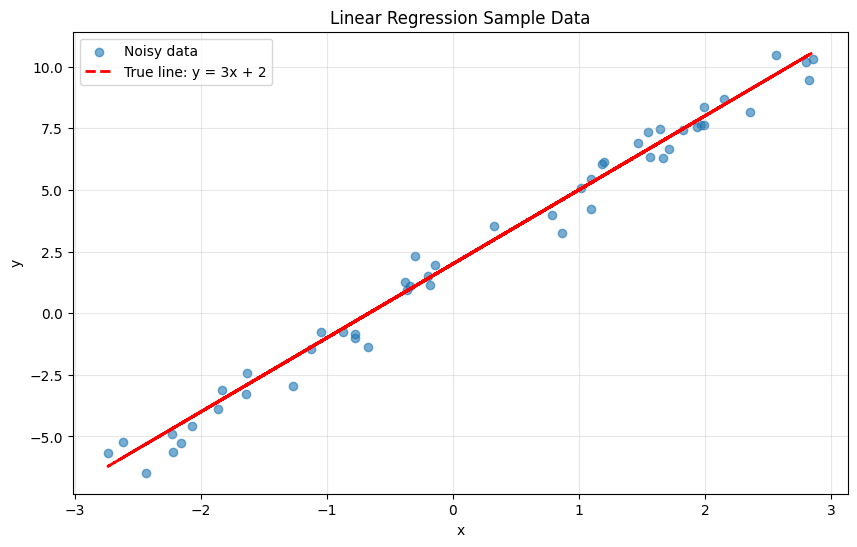

In [23]:
# Install matplotlib if not available
import sys
import subprocess
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print("Installing matplotlib...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
    import matplotlib.pyplot as plt

# Display basic statistics
print(f"Number of samples: {n}")
print(f"x range: [{x.min():.2f}, {x.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")
print(f"\nFirst 5 samples:")
print(f"x: {x[:5]}")
print(f"y: {y[:5]}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Noisy data')
plt.plot(x, 3*x + 2, 'r--', label='True line: y = 3x + 2', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Sample Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Linear Regression Using Least Squares Method

This cell implements **linear regression** from scratch using the **least squares** formula to find the best-fit line for our noisy data.

### The Goal
Find the line **y = mx + b** that best fits our data by minimizing the sum of squared errors between predicted and actual y values.

### The Mathematics

For linear regression with intercept, we use matrix form:

- Design matrix X: Each row is `[1, x_i]` where the 1 is for the intercept term
- Parameters w: `[b, m]` where b is intercept, m is slope
- **Least squares formula**: `w = (X^T X)^(-1) X^T y`

### Step-by-Step Process

1. Build design matrix X: `np.c_[np.ones_like(x), x]`
   - Column 1: All ones (for intercept b)
   - Column 2: The x values (for slope m)
   - Shape: (n, 2)

2. Compute X^T X: Matrix multiplication of transpose of X with X

3. Compute inverse: `(X^T X)^(-1)` 

4. Compute X^T y: Transpose of X multiplied by y vector

5. Final solution: `w = (X^T X)^(-1) X^T y`

### Why This Works

The least squares method finds parameters that minimize the **sum of squared residuals** (errors). This is the optimal solution when errors follow a normal distribution.

### Expected Result

Since we generated data with y = 3x + 2 + noise, we expect:

- Slope (m) ≈ 3
- Intercept (b) ≈ 2

The values won't be exact due to the random noise we added.

In [24]:
# Assuming we already have x, y from previous step
import numpy as np

# X is a matrix with 2 columns:
#   - column 1: all 1s (for intercept b)
#   - column 2: x values
X = np.c_[np.ones_like(x), x]   # shape (n, 2)

# Least squares formula:
# w = (X^T X)^(-1) X^T y
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ y
w = XtX_inv @ XtY

b, m = w
print("b (intercept) =", b)
print("m (slope)     =", m)

b (intercept) = 1.8632311896955387
m (slope)     = 3.016101347688831


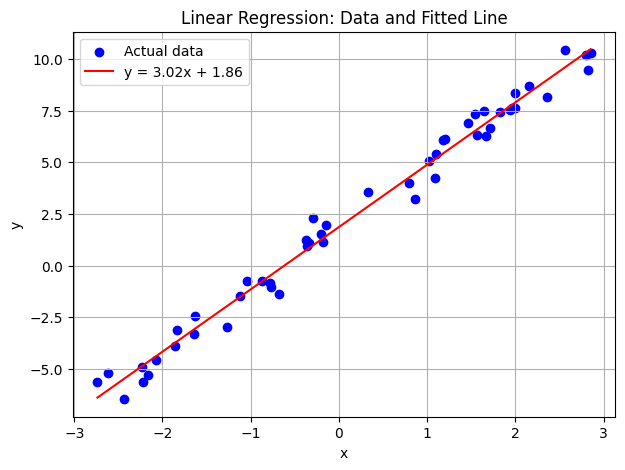

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming we still have x, y, b, m from previous section

plt.figure(figsize=(7,5))

# Plot the actual data points (x, y)
plt.scatter(x, y, color='blue', label='Actual data')

# Create 100 smooth x points to draw the regression line
x_line = np.linspace(min(x), max(x), 100)
y_line = m * x_line + b

# Draw the regression line
plt.plot(x_line, y_line, color='red', label=f'y = {m:.2f}x + {b:.2f}')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Data and Fitted Line")
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model Performance: Error Metrics

This cell calculates error metrics to evaluate how well our linear regression model fits the data.

### Predictions

- **y_hat**: Predicted values using our model `y_hat = mx + b`
- These are what our model predicts for each x value

### Error Metrics

**1. MAE (Mean Absolute Error)**

- Formula: `MAE = mean(|y - y_hat|)`
- Takes the average of absolute differences between actual and predicted values
- Interpretation: On average, how far off are our predictions?
- Advantage: Easy to interpret - same units as y
- Use case: When you want to understand typical prediction error

**2. RMSE (Root Mean Squared Error)**

- Formula: `RMSE = sqrt(mean((y - y_hat)²))`
- Takes the square root of the average squared errors
- Penalizes large errors more than MAE due to squaring
- Advantage: More sensitive to **outliers**
- Use case: When large errors are particularly undesirable

### Comparison

- RMSE ≥ MAE (always true)
- If RMSE >> MAE: Model has some large errors (outliers)
- If RMSE ≈ MAE: Errors are relatively uniform

### Expected Results

Since we added noise with std=0.8, we expect errors around that magnitude. Lower values indicate a better fit to the data.

In [26]:
# Predict y values from the model
y_hat = m * x + b

# Mean Absolute Error
mae = np.mean(np.abs(y - y_hat))

# Root Mean Squared Error
rmse = np.sqrt(np.mean((y - y_hat)**2))

print("MAE  =", mae)
print("RMSE =", rmse)

MAE  = 0.5031290627410547
RMSE = 0.605827185639896


# Python Functions

## Understanding Functions, Call Frames, and Variable Scope

Functions are fundamental building blocks in Python that allow us to organize code into reusable pieces. Understanding how functions work internally helps write better, more maintainable code.

### What is a Function?

A **function** is a named block of code that performs a specific task. It can:

- Accept input (parameters)
- Perform operations
- Return output (return value)

### Call Frames and Call Stack

When a function is called, Python creates a **call frame** (also called **activation record**) that contains:

- **Local variables**: Variables defined within the function
- **Parameters**: Function arguments
- **Return address**: Where to return after the function completes

The **call stack** is a data structure that manages these call frames:

- When a function is called, a new frame is **pushed** onto the stack
- When a function returns, its frame is **popped** from the stack
- The stack follows **Last-In-First-Out (LIFO)** order

### Variable Scope

Python has different scopes for variables:

**1. Local Variables**

- Defined inside a function
- Only accessible within that function
- Created when function is called, destroyed when it returns
- Stored in the function's call frame

**2. Global Variables**

- Defined outside all functions (at module level)
- Accessible from anywhere in the module
- Exist for the entire program execution
- Should be used sparingly to avoid side effects

**3. Enclosing Scope (for nested functions)**

- Variables from outer function accessible to inner function
- Enables closures

### Example: How the Call Stack Works

```python
def add(a, b):      # When called: frame pushed with local vars a, b
    result = a + b  # Local variable 'result' created
    return result   # Frame popped, returns to caller
```

**Call stack visualization:**
```
main() is running
  ↓ calls add(3, 5)
  Stack: [main_frame, add_frame]  ← add_frame has a=3, b=5, result=8
  ↓ add returns
  Stack: [main_frame]  ← add_frame removed
```

This cell demonstrates a simple `add` function to illustrate these concepts.

In [27]:
# Example: Function with local and global variables

# Global variable
global_var = 100

def add(a, b):
    """
    Adds two numbers and returns the result.
    
    Parameters:
    - a, b: local variables (parameters)
    
    Returns:
    - sum of a and b
    """
    # Local variable
    result = a + b
    
    # Can access global variable (read-only without 'global' keyword)
    print(f"Global variable value: {global_var}")
    
    return result

# Call the function
x = 3
y = 5
sum_result = add(x, y)

print(f"add({x}, {y}) = {sum_result}")
print(f"After function call, global_var = {global_var}")

# Demonstrate that local variables don't exist outside the function
try:
    print(result)  # This will raise NameError
except NameError as e:
    print(f"\nError: {e}")
    print("'result' is a local variable and doesn't exist outside the function")

Global variable value: 100
add(3, 5) = 8
After function call, global_var = 100

Error: name 'result' is not defined
'result' is a local variable and doesn't exist outside the function


## Understanding UnboundLocalError

This cell demonstrates a common error when working with global variables inside functions: **UnboundLocalError**.

### What is UnboundLocalError?

`UnboundLocalError` occurs when Python detects that a variable is assigned to within a function, making it a **local variable**, but the code tries to read its value before it has been assigned.

### Why Does This Happen?

Python's variable resolution follows these rules:

1. When Python sees an **assignment** to a variable anywhere in a function (like `count = count + 1`), it treats that variable as **local** for the entire function
2. This decision is made during **compile time**, before the function even runs
3. When the function executes and tries to read `count` on the right side of `count = count + 1`, Python looks for it in the local scope
4. Since `count` hasn't been assigned locally yet, we get `UnboundLocalError`

### The Problem in This Example

```python
count = 0           # Global variable

def increase():
    count = count + 1  # ERROR! Python sees assignment, makes 'count' local
                       # But tries to read 'count' before it's assigned locally
    print(count)
```

**What Python sees:**

- Line `count = count + 1` has an assignment, so `count` is marked as LOCAL
- Right side tries to read `count`, but local `count` doesn't exist yet
- Result: UnboundLocalError

### Solutions

Solution 1: Use the `global` keyword (if you want to modify the global variable)
```python
def increase():
    global count       # Declare that we're using the global 'count'
    count = count + 1
    print(count)
```

Solution 2: Return a new value (better practice - avoid modifying globals)
```python
def increase(value):
    return value + 1

count = increase(count)
```

This error is Python's way of preventing ambiguous variable scope and potential bugs!

In [28]:
count = 0

def increase():
    count = count + 1
    print(count)

increase()

UnboundLocalError: local variable 'count' referenced before assignment

# Introduction to Pandas

## Working with Tabular Data

**Pandas** is a powerful Python library for data manipulation and analysis. It provides data structures and tools for working with structured data, making it essential for data science, analytics, and machine learning tasks.

### What is a DataFrame?

A **DataFrame** is Pandas' primary data structure - a two-dimensional table similar to a spreadsheet or SQL table. It consists of:

- Rows: Each row represents a record or observation
- Columns: Each column represents a feature or variable
- Index: Labels for rows (can be numbers, dates, or custom labels)
- Column names: Labels for columns

### Key Features of DataFrames

- Handles mixed data types: Each column can have a different type (integers, strings, floats, etc.)
- Size-mutable: You can add or remove rows and columns
- Labeled axes: Both rows and columns have labels for easy data access
- Powerful indexing: Select data by label, position, or boolean conditions
- Built-in operations: Sorting, filtering, grouping, merging, and statistical functions

### Creating a DataFrame

The example in this cell creates a DataFrame from a Python dictionary:

```python
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["Hanoi", "HCM", "Danang"]
}
df = pd.DataFrame(data)
```

This creates a table with 3 rows and 3 columns, where:
- Column keys become column names
- List values become the data in each column
- Row indices are automatically assigned (0, 1, 2)

Pandas is built on top of NumPy and integrates seamlessly with matplotlib for data visualization, making it a cornerstone of the Python data science ecosystem.

In [ ]:
import sys
import subprocess

try:
    import pandas as pd
except ModuleNotFoundError:
    print("Installing pandas...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"])
    import pandas as pd

In [ ]:
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["Hanoi", "HCM", "Danang"]
}

df = pd.DataFrame(data)
print(df)

      Name  Age    City
0    Alice   25   Hanoi
1      Bob   30     HCM
2  Charlie   35  Danang


In [29]:
import numpy as np
import pandas as pd

# NumPy array
a = np.array([[1, 2, 3], [4, 5, 6]])
print("NumPy array:\n", a)

# Pandas DataFrame
df = pd.DataFrame(a, columns=["A", "B", "C"])
print("\nPandas DataFrame:\n", df)

NumPy array:
 [[1 2 3]
 [4 5 6]]

Pandas DataFrame:
    A  B  C
0  1  2  3
1  4  5  6


### NumPy Arrays vs Pandas DataFrames

NumPy arrays are designed for numerical operations and scientific computing:

- Homogeneous data: All elements must be the same type (all integers, all floats, etc.)
- N-dimensional: Can represent vectors, matrices, or higher-dimensional tensors
- Fast numerical operations: Optimized for mathematical computations
- Accessed by position: Use integer indices like `arr[0]` or `arr[0, 1]`
- Best for: Linear algebra, mathematical modeling, image processing

Example:
```python
arr = np.array([[1, 2, 3], [4, 5, 6]])  # 2D array
print(arr[0, 1])  # Access by row, column indices
```

DataFrames are built on top of NumPy but designed for structured, tabular data:

- Heterogeneous data: Each column can have a different type (strings, numbers, dates, etc.)
- Two-dimensional table: Rows and columns with labels
- Rich functionality: Built-in methods for filtering, grouping, joining, and statistical analysis
- Accessed by labels: Use column names like `df['Name']` or `df.loc[0, 'Name']`
- Best for: Data cleaning, exploratory analysis, working with CSV/Excel files, SQL-like operations

Example:
```python
df = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Age': [25, 30]})
print(df['Name'])  # Access by column name
```

### When to Use Which?

- Use NumPy: When working with purely numerical data, matrices, mathematical operations, or when performance is critical
- Use Pandas: When working with real-world datasets, mixed data types, need column labels, or performing data analysis tasks

Both libraries complement each other - Pandas is built on NumPy, so you can often convert between them and use both in the same project!

## Working with CSV file

In [42]:
import pandas as pd

try:
    df = pd.read_csv("../data/data.csv")
    print(f"File loaded successfully! Shape: {df.shape}")
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Check the path.")
except Exception as e:
    print(f"Error reading file: {e}")

File loaded successfully! Shape: (10, 6)
      Name  Age    City  Salary   Department  Years_Experience
0    Alice   25   Hanoi    1200  Engineering                 2
1      Bob   30     HCM    1500    Marketing                 5
2  Charlie   35  Danang    1800  Engineering                 8
3    Diana   28   Hanoi    1400        Sales                 4
4      Eve   32     HCM    1600  Engineering                 7


- Reading metadata

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              10 non-null     object
 1   Age               10 non-null     int64 
 2   City              10 non-null     object
 3   Salary            10 non-null     int64 
 4   Department        10 non-null     object
 5   Years_Experience  10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


Some other useful commands with Pandas

- Reading first 5 lines

In [45]:
df.head()

,Name,Age,City,Salary,Department,Years_Experience
0,Alice,25,Hanoi,1200,Engineering,2
1,Bob,30,HCM,1500,Marketing,5
2,Charlie,35,Danang,1800,Engineering,8
3,Diana,28,Hanoi,1400,Sales,4
4,Eve,32,HCM,1600,Engineering,7


- Reading last 5 lines

In [46]:
df.tail()

,Name,Age,City,Salary,Department,Years_Experience
5,Frank,27,Danang,1300,Marketing,3
6,Grace,29,Hanoi,1450,Sales,5
7,Henry,33,HCM,1700,Engineering,9
8,Ivy,26,Danang,1250,Marketing,2
9,Jack,31,Hanoi,1550,Sales,6


- Basic statistical informaiton (mean, std, min, max)

In [48]:
df.describe()

,Age,Salary,Years_Experience
count,10.000000,10.000000,10.000000
mean,29.600000,1475.000000,5.100000
std,3.204164,194.722024,2.424413
min,25.000000,1200.000000,2.000000
25%,27.250000,1325.000000,3.250000
50%,29.500000,1475.000000,5.000000
75%,31.750000,1587.500000,6.750000
max,35.000000,1800.000000,9.000000


- Get a single colum name

In [49]:
print(df["Name"])

0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
5      Frank
6      Grace
7      Henry
8        Ivy
9       Jack
Name: Name, dtype: object


- Read the first line

In [50]:
print(df.iloc[0])

Name                      Alice
Age                          25
City                      Hanoi
Salary                     1200
Department          Engineering
Years_Experience              2
Name: 0, dtype: object


- Read the second line, and pick `City` column.

In [51]:
print(df.loc[1, "City"])

HCM


Example: Adding index for column

In [52]:
import pandas as pd

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["Hanoi", "HCM", "Danang"]
}, index=["a", "b", "c"])

print(df, "\n")

      Name  Age    City
a    Alice   25   Hanoi
b      Bob   30     HCM
c  Charlie   35  Danang 



In [ ]:
print("iloc[0, 2]  →", df.iloc[0, 2])    # Position (0, 2)

iloc[0, 2]  → Hanoi


In [55]:
print("loc['a', 'City'] →", df.loc["a", "City"])  # label (a, City)

loc['a', 'City'] → Hanoi


### Data Filtering

Given previous example, but add `Salary` field

In [56]:
import pandas as pd

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 28],
    "City": ["Hanoi", "HCM", "Danang", "Hue"],
    "Salary": [1200, 1500, 1800, 1300]
})

- Filter people with one condition: who have a high salary, or name start with.

In [57]:
df[df["Salary"] > 1300]

,Name,Age,City,Salary
1,Bob,30,HCM,1500
2,Charlie,35,Danang,1800


In [60]:
df[df["Name"].str.startswith("A")]

,Name,Age,City,Salary
0,Alice,25,Hanoi,1200


- Filter people which more conditions

In [58]:
df[(df["Salary"] > 1300) & (df["Age"] < 35)]

,Name,Age,City,Salary
1,Bob,30,HCM,1500


- Filter within a set

In [59]:
df[df["City"].isin(["Hanoi", "Hue"])]

,Name,Age,City,Salary
0,Alice,25,Hanoi,1200
3,David,28,Hue,1300


### Data Selection, Sorting

In [63]:
import pandas as pd

try:
    df = pd.read_csv("../data/data.csv")
    print(f"File loaded successfully! Shape: {df.shape}\n")
    
    # Print statistics for Salary column
    print("=== Salary Statistics ===")
    print(f"Mean: {df['Salary'].mean()}")
    print(f"Max: {df['Salary'].max()}")
    print(f"Min: {df['Salary'].min()}")
    print(f"Sum: {df['Salary'].sum()}")
    print(f"Standard Deviation: {df['Salary'].std()}")
    
    # Or use describe() for all stats at once
    print("\n=== Using describe() ===")
    print(df['Salary'].describe())
    
except FileNotFoundError:
    print("Error: File not found. Check the path.")
except Exception as e:
    print(f"Error: {e}")

File loaded successfully! Shape: (10, 6)

=== Salary Statistics ===
Mean: 1475.0
Max: 1800
Min: 1200
Sum: 14750
Standard Deviation: 194.72202409246538

=== Using describe() ===
count      10.000000
mean     1475.000000
std       194.722024
min      1200.000000
25%      1325.000000
50%      1475.000000
75%      1587.500000
max      1800.000000
Name: Salary, dtype: float64


### Data Group

Given the sample data

In [2]:
import pandas as pd

df = pd.DataFrame({
    "City": ["Hanoi", "HCM", "Hanoi", "HCM", "Danang"],
    "Department": ["IT", "IT", "HR", "Finance", "Finance"],
    "Salary": [1200, 1500, 1000, 2000, 1800],
    "Age": [25, 28, 30, 40, 35]
})

print(df)

     City Department  Salary  Age
0   Hanoi         IT    1200   25
1     HCM         IT    1500   28
2   Hanoi         HR    1000   30
3     HCM    Finance    2000   40
4  Danang    Finance    1800   35


- Get `Salary` mean group by `City`

In [3]:
df.groupby("City")["Salary"].mean()

City
Danang    1800.0
HCM       1750.0
Hanoi     1100.0
Name: Salary, dtype: float64

- Doing different statistical calculation with group

In [4]:
df.groupby("City")["Salary"].agg(["mean", "min", "max", "count"])

,mean,min,max,count
City,,,,
Danang,1800.0,1800,1800,1
HCM,1750.0,1500,2000,2
Hanoi,1100.0,1000,1200,2


- Return salary deviation (max-min) group by city

In [5]:
def range_func(x):
    return x.max() - x.min()

df.groupby("City")["Salary"].agg(range_func)

City
Danang      0
HCM       500
Hanoi     200
Name: Salary, dtype: int64

### Data Visualization

Let prepare input data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "City": ["Hanoi", "HCM", "Hanoi", "HCM", "Danang", "Hue", "Hanoi"],
    "Salary": [1200, 1500, 1000, 2000, 1800, 1600, 1300],
    "Age": [25, 28, 30, 40, 35, 33, 26]
})

Then get an average of `Salary` group by the `City`

In [2]:
avg_salary = df.groupby("City", as_index=False)["Salary"].mean()
print(avg_salary)

     City       Salary
0  Danang  1800.000000
1     HCM  1750.000000
2   Hanoi  1166.666667
3     Hue  1600.000000


And show collected data in the bar chart

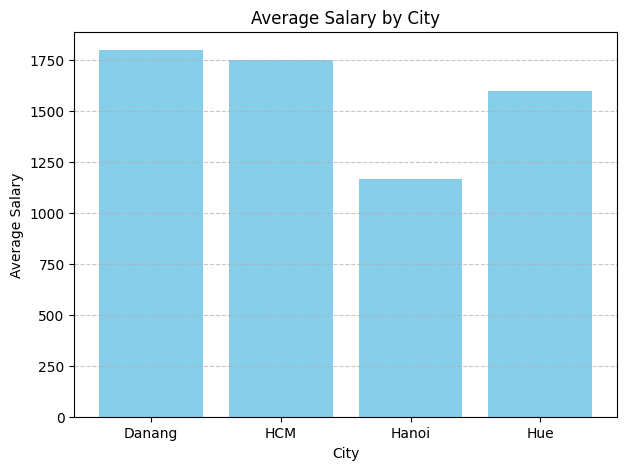

In [3]:
plt.figure(figsize=(7,5))
plt.bar(avg_salary["City"], avg_salary["Salary"], color="skyblue")
plt.title("Average Salary by City")
plt.xlabel("City")
plt.ylabel("Average Salary")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Or we can also use line chart

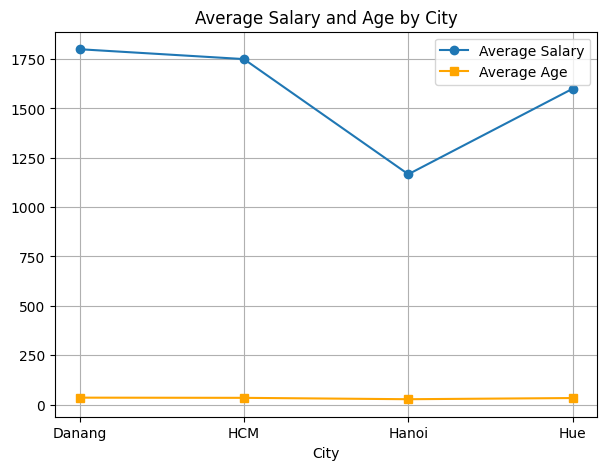

In [4]:
grouped = df.groupby("City", as_index=False).agg({
    "Salary": "mean",
    "Age": "mean"
})

plt.figure(figsize=(7,5))
plt.plot(grouped["City"], grouped["Salary"], marker="o", label="Average Salary")
plt.plot(grouped["City"], grouped["Age"], marker="s", label="Average Age", color="orange")
plt.title("Average Salary and Age by City")
plt.xlabel("City")
plt.legend()
plt.grid(True)
plt.show()

What if we want to compare `Salary` by group more than one columns. Let consider the dataset we collect salary based on both `City` and `Department` as belowing:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "City": ["Hanoi", "Hanoi", "HCM", "HCM", "Danang", "Danang", "Hue", "Hue"],
    "Department": ["IT", "HR", "IT", "Finance", "Finance", "HR", "IT", "Finance"],
    "Salary": [1200, 1000, 2000, 1800, 1600, 1400, 1300, 1250]
})

Get the average `Salary` by `City` and `Department`

In [6]:
avg_salary = df.groupby(["City", "Department"])["Salary"].mean().unstack()
print(avg_salary)

Department  Finance      HR      IT
City                               
Danang       1600.0  1400.0     NaN
HCM          1800.0     NaN  2000.0
Hanoi           NaN  1000.0  1200.0
Hue          1250.0     NaN  1300.0


Showing data in the chart

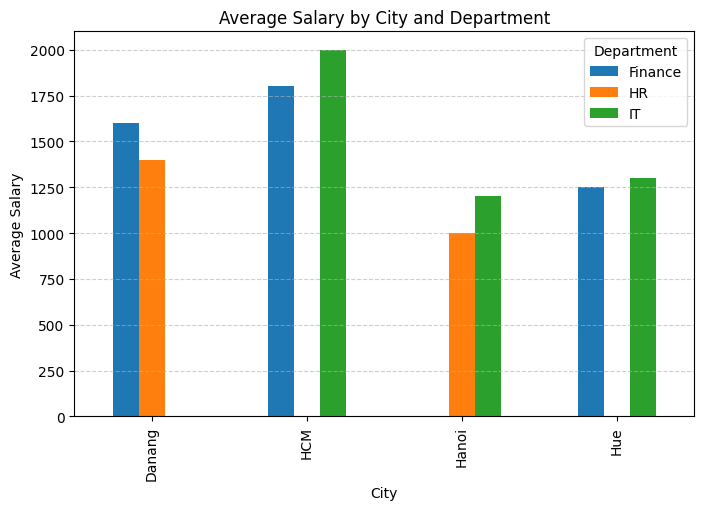

In [7]:
avg_salary.plot(kind="bar", figsize=(8,5))
plt.title("Average Salary by City and Department")
plt.xlabel("City")
plt.ylabel("Average Salary")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Department")
plt.show()